<a href="https://colab.research.google.com/github/Tfaniedys/Fanie-s-New-test/blob/main/235314106_StudiKasus_AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Load dataset
df = pd.read_csv("adult.csv")

In [17]:
# Menampilkan info awal
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [40]:
# Membersihkan nama kolom dari spasi ekstra
df.columns = df.columns.str.strip()

In [41]:
# Cetak nama kolom sebelum preprocessing
print("Kolom sebelum preprocessing:", df.columns.tolist())

Kolom sebelum preprocessing: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']


In [75]:
# Menghapus duplikasi
duplicate_count = df.duplicated().sum()
print(f"Jumlah duplikasi sebelum dihapus: {duplicate_count}")
df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi setelah dihapus: {df.duplicated().sum()}")

Jumlah duplikasi sebelum dihapus: 6
Jumlah duplikasi setelah dihapus: 0


In [79]:
print("Jumlah duplikasi:", df.duplicated().sum())


Jumlah duplikasi: 0


In [58]:
# Ganti '?' dengan NaN dan isi nilai hilang
df.replace(' ?', np.nan, inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [59]:
# Encoding kolom kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [44]:
# Menampilkan jumlah data yang hilang
print(df.isnull().sum())

39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64


In [45]:
# Mengisi nilai hilang pada kolom kategorikal dengan modus
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [46]:
# Menghapus spasi ekstra dalam kolom kategorikal
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-46-2f089cf549f4>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [47]:
# Cetak nama kolom sebelum encoding
print("Kolom sebelum encoding:", df.columns.tolist())

Kolom sebelum encoding: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']


In [48]:
# Konversi data kategorikal ke numerik dengan Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [49]:
# Cetak nama kolom setelah encoding
print("Kolom setelah encoding:", df.columns.tolist())

Kolom setelah encoding: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']


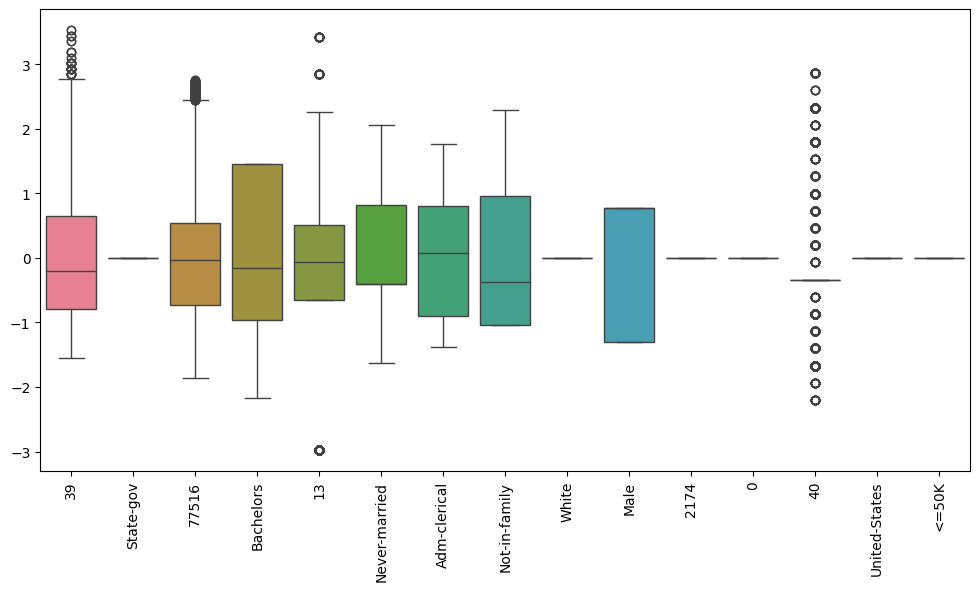

In [50]:
# Deteksi outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()


In [51]:
# Menghapus outlier berdasarkan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [60]:
# Normalisasi fitur numerik
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))



In [61]:
# Cek apakah kolom 'income' ada
print("Kolom setelah preprocessing:", df.columns.tolist())

Kolom setelah preprocessing: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']


In [53]:
# Cetak nama kolom setelah preprocessing
print("Kolom setelah preprocessing:", df.columns.tolist())
print("5 baris pertama dataset setelah preprocessing:")
print(df.head())

Kolom setelah preprocessing: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']
5 baris pertama dataset setelah preprocessing:
          39  State-gov     77516  Bachelors        13  Never-married  \
1   0.240646        0.0  0.485455  -0.202224 -0.761782      -1.644969   
4   0.155255        0.0  1.325380   0.219617  2.576516      -0.415581   
16 -0.271700        0.0  0.134285  -0.202224 -0.761782       0.813808   
23  2.033858        0.0 -0.813749  -0.202224 -0.761782      -1.644969   
25 -1.381784        0.0 -0.091487  -0.202224 -0.761782       0.813808   

    Adm-clerical  Not-in-family  White      Male  2174    0            40  \
1      -0.100652      -0.409316    0.0  0.782906   0.0  0.0 -1.110223e-16   
4      -0.590846       2.240225    0.0 -1.277292   0.0  0.0 -1.110223e-16   
16      0.144445       1.577840    0.0  0.782906   0.0  0.0 -1.110223e-16   
23      1.615027 

In [80]:
# Pastikan kolom 'income' ada dalam dataset
if 'income' in df.columns:
    print("Kolom '<=50K' ditemukan! Berikut adalah beberapa nilai dari kolom '<=50K':")
    print(df['<=50K'].head())

In [72]:
print(df.dtypes)



39               float64
State-gov        float64
77516            float64
Bachelors        float64
13               float64
Never-married    float64
Adm-clerical     float64
Not-in-family    float64
White            float64
Male             float64
2174             float64
0                float64
40               float64
United-States    float64
<=50K            float64
dtype: object


In [73]:
print(df.describe())


                 39  State-gov         77516     Bachelors            13  \
count  5.384000e+03     5384.0  5.384000e+03  5.384000e+03  5.384000e+03   
mean   9.897976e-18        0.0  1.847622e-17 -6.598651e-18 -3.827218e-17   
std    1.000093e+00        0.0  1.000093e+00  1.000093e+00  1.000093e+00   
min   -1.552566e+00        0.0 -1.912610e+00 -1.889588e+00 -7.617816e-01   
25%   -8.694374e-01        0.0 -7.295325e-01 -2.022236e-01 -7.617816e-01   
50%   -1.863092e-01        0.0 -2.957076e-03 -2.022236e-01 -9.412212e-02   
75%    6.676012e-01        0.0  5.603847e-01  1.485141e+00  5.735373e-01   
max    2.802377e+00        0.0  2.574154e+00  1.485141e+00  2.576516e+00   

       Never-married  Adm-clerical  Not-in-family   White          Male  \
count   5.384000e+03  5.384000e+03   5.384000e+03  5384.0  5.384000e+03   
mean    2.507487e-17 -2.556977e-17  -3.233339e-17     0.0  4.619056e-17   
std     1.000093e+00  1.000093e+00   1.000093e+00     0.0  1.000093e+00   
min    -1.64496

In [76]:
if '<=50K' in df.columns:
    print("Kolom '<=50K' ditemukan! Berikut adalah beberapa nilai dari kolom '<=50K':")
    print(df['<=50K'].head())

    # Pisahkan fitur (X) dan target (y)
    X = df.drop('<=50K', axis=1)
    y = df['<=50K']


Kolom '<=50K' ditemukan! Berikut adalah beberapa nilai dari kolom '<=50K':
1     0.0
4     0.0
16    0.0
23    0.0
25    0.0
Name: <=50K, dtype: float64
